Steps:
1. Import CSV file in dataframe
2. Data Processing
3. Categorical to Numirical
4. Data Visualization
5. Split the dataset in train and test
6. Build the model
7. Evaluate the model

Target Variable:
0 - Employees that are retained by the company
1 - Employees that left the company

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Import CSV file in dataframe:

In [5]:
df= pd.read_csv('HR_comma_sep.csv')

In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data Processing:

In [8]:
df.shape

(14999, 10)

In [9]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [12]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [13]:
df= df.rename(columns= {'sales' : 'department'})
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
df.department.value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [15]:
# data correction
df['department']= np.where(df['department']== 'support', 'technical', df['department'])
df['department']= np.where(df['department']== 'IT', 'technical', df['department'])

In [16]:
df.department.value_counts()

department
technical      6176
sales          4140
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [17]:
# check for duplicate values
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1189,0.36,0.51,2,155,3,0,1,0,technical,low
1213,0.38,0.55,2,134,3,0,1,0,technical,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,technical,low
14995,0.37,0.48,2,160,3,0,1,0,technical,low
14996,0.37,0.53,2,143,3,0,1,0,technical,low
14997,0.11,0.96,6,280,4,0,1,0,technical,low


In [18]:
df.drop_duplicates(inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11987 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11987 non-null  float64
 1   last_evaluation        11987 non-null  float64
 2   number_project         11987 non-null  int64  
 3   average_montly_hours   11987 non-null  int64  
 4   time_spend_company     11987 non-null  int64  
 5   Work_accident          11987 non-null  int64  
 6   left                   11987 non-null  int64  
 7   promotion_last_5years  11987 non-null  int64  
 8   department             11987 non-null  object 
 9   salary                 11987 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### Data Visualization:

<Axes: xlabel='satisfaction_level', ylabel='left'>

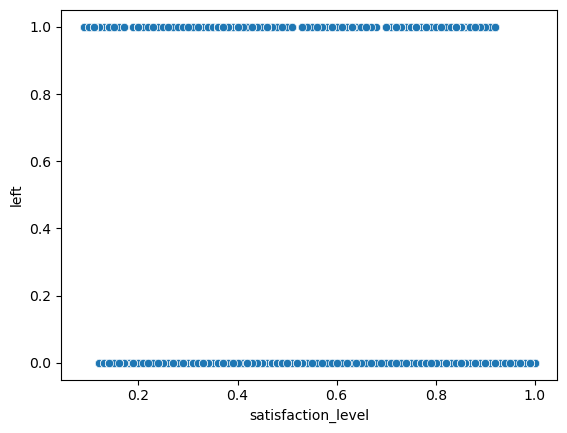

In [20]:
sns.scatterplot(data= df, x= 'satisfaction_level', y= 'left')

<Axes: xlabel='last_evaluation', ylabel='satisfaction_level'>

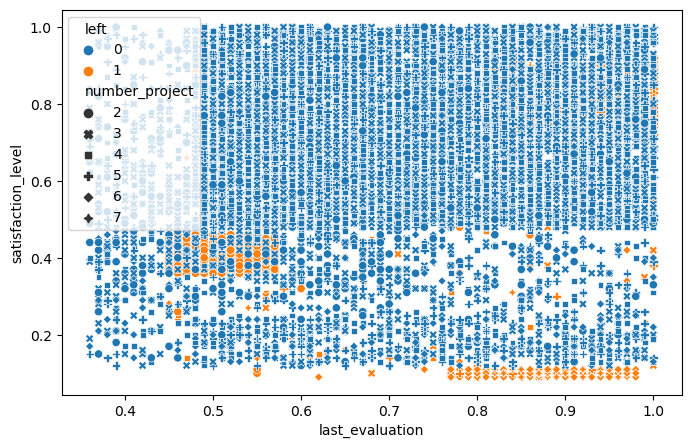

In [21]:
plt.figure(figsize= [8,5])
sns.scatterplot(data= df, x= 'last_evaluation', y= 'satisfaction_level', hue= 'left', style= 'number_project')

<Axes: xlabel='number_project', ylabel='left'>

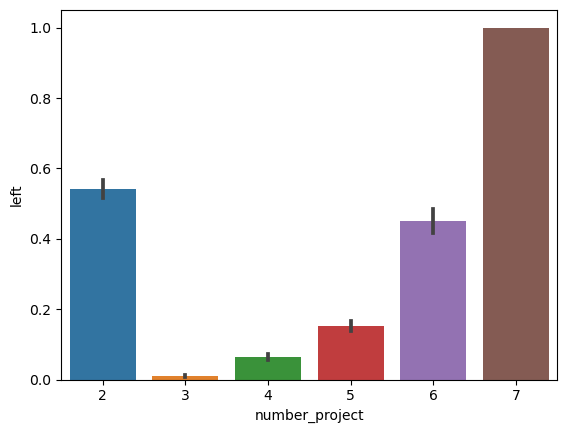

In [22]:
sns.barplot(data= df, x= 'number_project', y= 'left')

<Axes: xlabel='department', ylabel='left'>

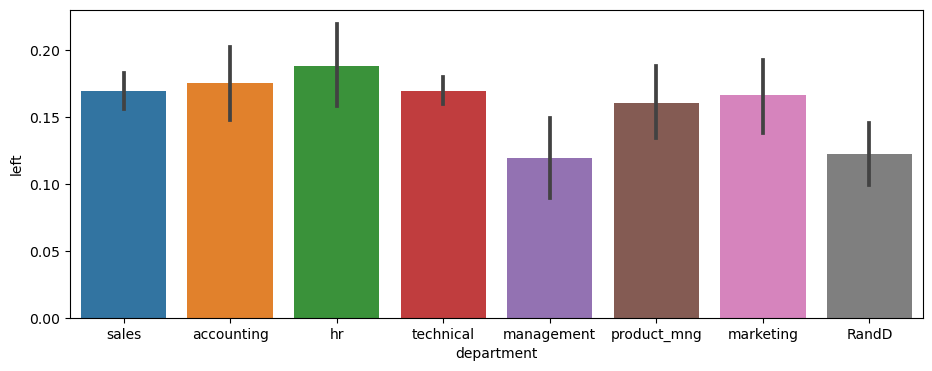

In [23]:
plt.figure(figsize= [11,4])
sns.barplot(data= df, x= 'department', y= 'left')

<Axes: xlabel='salary', ylabel='left'>

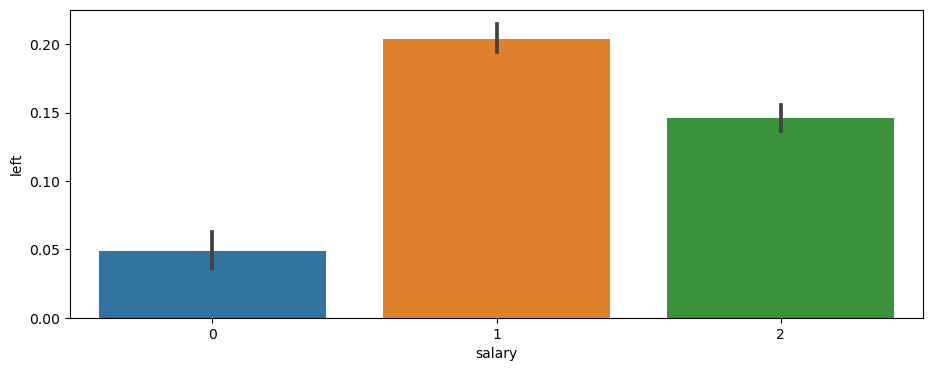

In [75]:
plt.figure(figsize= [11,4])
sns.barplot(data= df, x= 'salary', y= 'left')

<Axes: xlabel='average_montly_hours', ylabel='satisfaction_level'>

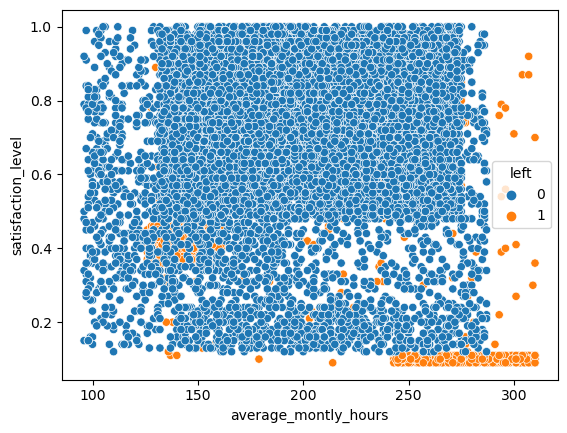

In [25]:
sns.scatterplot(data= df, x= 'average_montly_hours', y= 'satisfaction_level', hue= 'left')

<Axes: xlabel='time_spend_company', ylabel='left'>

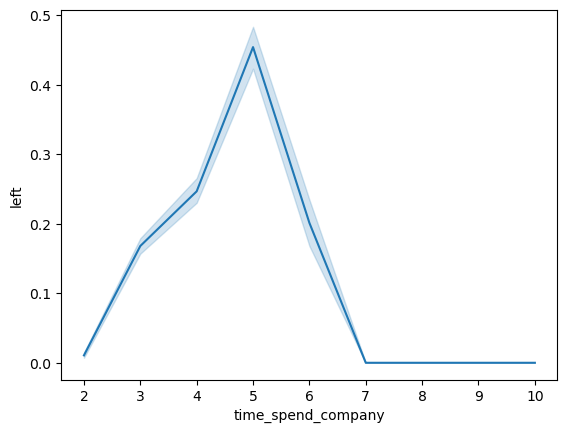

In [26]:
sns.lineplot(data= df, x= 'time_spend_company', y= 'left')

### Categorical to Numerical:

In [28]:
le= LabelEncoder()
df['department']= le.fit_transform(df['department'])
df['salary']= le.fit_transform(df['salary'])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,6,1
1,0.80,0.86,5,262,6,0,1,0,6,2
2,0.11,0.88,7,272,4,0,1,0,6,2
3,0.72,0.87,5,223,5,0,1,0,6,1
4,0.37,0.52,2,159,3,0,1,0,6,1


In [29]:
# Check for imbalance data:
x= df.drop('left', axis=1)
y= df['left']

In [30]:
y.value_counts()

left
0    10000
1     1987
Name: count, dtype: int64

In [31]:
# Use SMOTE Technique:
from imblearn.over_sampling import SMOTE
oversample= SMOTE()
x, y= oversample.fit_resample(x, y)

In [32]:
y.value_counts()

left
1    10000
0    10000
Name: count, dtype: int64

### Split the dataset in train and test:

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state= 42)

### Build Models:

In [36]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [37]:
lr.score(x_train, y_train)

0.8073571428571429

In [38]:
lr.score(x_test, y_test)

0.8035

In [39]:
# Logistic Regression Accuracy score is around 80%

In [40]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [41]:
clf.score(x_train, y_train)

1.0

In [42]:
clf.score(x_test, y_test)

0.9508333333333333

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators= 10)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [50]:
rf.score(x_train, y_train)

0.9975

In [52]:
rf.score(x_test, y_test)

0.9643333333333334

### Cross Validation:

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [61]:
cross_val_score(lr, x, y, cv= 5).mean()

0.7973000000000001

In [63]:
cross_val_score(clf, x, y, cv= 5).mean()

0.9489500000000002

In [65]:
cross_val_score(rf, x, y, cv= 5).mean()

0.9651500000000001

### Confusion Matrix:

In [68]:
y_pred= rf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[2996,   41],
       [ 173, 2790]], dtype=int64)

### Correction Areas:

In [77]:
# Most of the attrition is in the HR Department.
# Employees with more than 5 projects left the company.
# Employees working more than 270 hrs left the company.
# Employees with low salary left the company.